## 관리권역 분석 접근 최종

In [170]:
import folium
import pandas as pd
from folium.plugins import TimestampedGeoJson
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

### bigquery 연동

In [171]:
#bigquery 연동하기 
from google.oauth2 import service_account
from google.cloud import bigquery

In [172]:
credentials = service_account.Credentials.from_service_account_file('./jsonkey.json')

In [173]:
credentials

In [174]:
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [175]:
client

In [176]:
pd.set_option('display.max_rows', None)  # 모든 행 표시
pd.set_option('display.max_columns', None)  # 모든 열 표시
pd.set_option('display.expand_frame_repr', False)  # 열이 화면 너비를 초과할 때 데이터프레임을 줄 바꿈하지 않도록 설정

In [177]:
# 텍스트 파일에서 대여소 리스트 불러오기
with open('/Users/nuri.park/Desktop/work_place/Seoul_bike_logistic_network/flask_server/station_id_list.txt', 'r') as file:
    station_id_list = [line.strip() for line in file.readlines()]

### 강남구 재고가 0이 되는 대여소 횟수 카운트

In [397]:
query = """ 
SELECT 
SUM(stock_0_count) AS no_stock,
Rental_location_ID
FROM `multi-final-project.Preprocessing.1109_관리권역_재고0인시간대카운트` 

WHERE
  stock_0_count = 1

GROUP BY
  Rental_location_ID

ORDER BY
  no_stock DESC"""

In [398]:
no_stock_df = client.query(query).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [399]:
no_stock_df

,no_stock,Rental_location_ID
0,24726,ST-1561
1,19540,ST-786
2,19145,ST-3108
3,19043,ST-1577
4,18977,ST-1896
...,...,...
160,354,ST-2681
161,291,ST-3268
162,281,ST-1364
163,221,ST-2677


In [400]:
# 텍스트 파일에서 대여소 리스트 불러오기
with open('/Users/nuri.park/Desktop/work_place/Seoul_bike_logistic_network/flask_server/station_id_list.txt', 'r') as file:
    station_id_list = [line.strip() for line in file.readlines()]

In [401]:
# 대여소 리스트와 일치하는 데이터만 필터링
filtered_df = no_stock_df[no_stock_df['Rental_location_ID'].isin(station_id_list)]

In [402]:
filtered_df.head(17)

,no_stock,Rental_location_ID
0,24726,ST-1561
1,19540,ST-786
2,19145,ST-3108
3,19043,ST-1577
4,18977,ST-1896
5,17876,ST-3115
6,17758,ST-809
7,17629,ST-2684
8,17492,ST-963
9,17309,ST-953


### 대여소 2개 그룹으로 나누기
하버사인(직선거리)기준, 관리 유용성을 위해 권역을 두개로 나눕니다. 

In [231]:
query = """
SELECT 
SUM(stock_0_count) AS no_stock,
NS.Rental_location_ID,
SI.Rental_location_number,
SI.Latitude,
SI.Longitude
FROM `multi-final-project.Preprocessing.1109_관리권역_재고0인시간대카운트` AS NS

JOIN
  `multi-final-project.Rental_Location_ID_master.Rental_Station_ID_master` AS SI
  ON
    NS.Rental_location_ID = SI.Rental_location_ID

WHERE
  stock_0_count = 1

GROUP BY
  NS.Rental_location_ID, SI.Rental_location_number,SI.Latitude, SI.Longitude

ORDER BY
  no_stock DESC
  """

In [232]:
no_stock_Haversine = client.query(query).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [233]:
# 대여소 리스트와 일치하는 데이터만 필터링
haversine_df = no_stock_Haversine[no_stock_Haversine['Rental_location_ID'].isin(station_id_list)]

In [236]:
haversine_32_df = haversine_df.head(32)

In [237]:
haversine_32_df.reset_index(drop=True, inplace=True)

In [238]:
haversine_df.reset_index(drop=True, inplace=True)

In [522]:
haversine_32_df[['Rental_location_ID','Latitude','Longitude']]

,Rental_location_ID,Latitude,Longitude
0,ST-1561,37.475986,127.059624
1,ST-786,37.517773,127.043022
2,ST-3108,37.505703,127.029198
3,ST-1577,37.498470,127.030113
4,ST-1896,37.500244,127.036057
5,ST-3115,37.497753,127.038574
6,ST-809,37.502396,127.058800
7,ST-2684,37.499866,127.060501
8,ST-963,37.516811,127.040474
9,ST-953,37.519787,127.056763


In [ ]:
# 거리 계산
distances = []
for i, loc1 in haversine_32_df.iterrows():
    for j, loc2 in haversine_32_df.iterrows():
        distance = haversine_distance(
            loc1['Latitude'], loc1['Longitude'],
            loc2['Latitude'], loc2['Longitude']
        )
        distances.append({
            'From': loc1['Rental_location_ID'],
            'To': loc2['Rental_location_ID'],
            'Distance_km': distance
        })



# 거리 데이터를 데이터프레임으로 변환
distance_df = pd.DataFrame(distances)

In [396]:

# 피벗 테이블 생성 및 정사각형 변환
pivot_table = distance_df.pivot(index='From', columns='To', values='Distance_km').fillna(0)
common_ids = pivot_table.index.intersection(pivot_table.columns)  # 공통 ID
pivot_table = pivot_table.loc[common_ids, common_ids]


In [424]:
locations = list(pivot_table.index)
clusters = []

while locations:
    current_cluster = [locations.pop(0)]
    for _ in range(16):  # 최대 16
        if not locations:
            break
        # 현재 클러스터의 마지막 대여소와 가장 가까운 대여소 선택
        closest = min(locations, key=lambda x: pivot_table.loc[current_cluster[-1], x])
        current_cluster.append(closest)
        locations.remove(closest)
    clusters.append(current_cluster)

# 결과 데이터프레임 생성
cluster_data = []
for cluster_id, rental_ids in enumerate(clusters, 1):
    for rental_id in rental_ids:
        cluster_data.append({'Rental_location_ID': rental_id, 'Cluster': cluster_id})


In [425]:
cluster_df = pd.DataFrame(cluster_data)

In [427]:
merged_df2 = pd.merge(cluster_df, k_means_filtered, on='Rental_location_ID', how='inner')

In [428]:
merged_df2

,Rental_location_ID,Cluster,Latitude,Longitude
0,ST-1180,1,37.514748,127.035133
1,ST-962,1,37.517590,127.035027
2,ST-961,1,37.518639,127.035400
3,ST-963,1,37.516811,127.040474
4,ST-786,1,37.517773,127.043022
5,ST-2682,1,37.519257,127.051598
6,ST-953,1,37.519787,127.056763
7,ST-3164,1,37.519737,127.057678
8,ST-784,1,37.515888,127.066200
9,ST-809,1,37.502396,127.058800


In [447]:
# 중심 좌표 설정 (예: 서울 중심 좌표)
center_lat, center_lon = 37.501663, 127.042976
map = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# 클러스터별 색상 설정
colors = ['blue','red']  # 클러스터별 색상

# 대여소별 클러스터를 CircleMarker로 표시
for _, row in merged_df2.iterrows():
    cluster_id = row['Cluster']
    station_id = row['Rental_location_ID']  # 대여소 ID
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],  # 위도, 경도 정보
        radius=4,  # 원 크기 (작게 설정)
        color=colors[cluster_id % len(colors)],  # 테두리 색상
        fill=True,
        fill_color=colors[cluster_id % len(colors)],  # 내부 색상
        fill_opacity=0.6,  # 투명도
        popup=f"Station ID: {station_id}<br>Cluster: {cluster_id}"  # 팝업에 대여소 ID와 클러스터 표시
    ).add_to(map)

In [430]:
map

### 관리 우선순위 대여소 시각화
우선 순위기준은 상습 재고부족 대여소 순으로 시각화합니다.

In [492]:
query = """
SELECT 
SUM(stock_0_count) AS no_stock,
NS.Rental_location_ID,
SI.Rental_location_number,
SI.Latitude,
SI.Longitude
FROM `multi-final-project.Preprocessing.1109_관리권역_재고0인시간대카운트` AS NS

JOIN
  `multi-final-project.Rental_Location_ID_master.Rental_Station_ID_master` AS SI
  ON
    NS.Rental_location_ID = SI.Rental_location_ID

WHERE
  stock_0_count = 1

GROUP BY
  NS.Rental_location_ID, SI.Rental_location_number,SI.Latitude, SI.Longitude

ORDER BY
  no_stock DESC
  """

In [493]:
stock_0_map_df = client.query(query).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [494]:
# 대여소 리스트와 일치하는 데이터만 필터링
filtered_df = stock_0_map_df[stock_0_map_df['Rental_location_ID'].isin(station_id_list)]

In [495]:
top_32_df=filtered_df.head(32)

In [496]:
bottom_32_df=filtered_df.head(32)

In [497]:
# 상위 20%, 중간 60%, 하위 20%의 경계를 구하기 위해 quantile 메서드 사용
upper_threshold = filtered_df['no_stock'].quantile(0.8)  # 상위 20%
lower_threshold = filtered_df['no_stock'].quantile(0.2)  # 하위 20%

# 지도 생성 (초기 중심 좌표를 첫 번째 데이터의 위치로 설정)
map_positron = folium.Map(
    location=[filtered_df['Latitude'].iloc[0], filtered_df['Longitude'].iloc[0]],
    zoom_start=14
)

# 데이터프레임을 반복하며 마커 추가
for idx, row in filtered_df.iterrows():
    popup_text = f"Location ID: {row['Rental_location_ID']}<br>Location num: {row['Rental_location_number']}<br>no_stock: {row['no_stock']}"
    
    # 색상 조건: 상위 20% 빨간색, 중간 60% 보라색, 하위 20% 파란색
    if row['no_stock'] >= upper_threshold:
        color = 'red'  # 상위 20%
    elif row['no_stock'] <= lower_threshold:
        color = 'blue'  # 하위 20%
    else:
        color = 'purple'  # 중간 60%
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        radius=3,
        color=color,       # 테두리 색상
        fill=True,
        fill_color=color   # 채우기 색상
    ).add_to(map_positron)


In [498]:
# 지도 출력 (노트북에서만 동작)
map_positron

In [499]:
# 지도 생성 (초기 중심 좌표를 첫 번째 데이터의 위치로 설정)
map_positron = folium.Map(
    location=[bottom_32_df['Latitude'].iloc[0], bottom_32_df['Longitude'].iloc[0]],
    zoom_start=14)

In [500]:
for idx, row in bottom_32_df.iterrows():
    popup_text = f"Location ID: {row['Rental_location_ID']}<br>Location num: {row['Rental_location_number']}<br>no_stock: {row['no_stock']}"
    # color = 'red' if row['no_stock'] >= threshold else 'blue'  # 상위 10%는 빨간색, 나머지는 파란색
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        radius=3,
        color='blue',       # 테두리 색상
        fill=True,
        fill_color=color   # 채우기 색상
    ).add_to(map_positron)

In [501]:
# 지도 출력 (노트북에서만 동작)
map_positron

### 관리 우선 순위 상위 32개 대여소 대여 패턴 k-means 클러스터링

In [502]:
query = """
WITH stocks AS (
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_03
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_04
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_05
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_06
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_07
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_08
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_09
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_10
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_11
)

SELECT
  SI.Rental_location_ID,
  stocks.Time,
  COUNT(*) AS zero_stock_count
FROM
  stocks
JOIN
  multi-final-project.Rental_Location_ID_master.Rental_Station_ID_master AS SI
ON
  stocks.Rental_location_number = SI.Rental_location_number
WHERE
  Address_gu LIKE '강남구'
  AND stocks.Num_of_available_bikes = 0
GROUP BY
  SI.Rental_location_ID,
  stocks.Time
ORDER BY
  SI.Rental_location_ID,
  stocks.Time
"""

In [503]:
stock_0_time_count_df = client.query(query).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [504]:
# 대여소 리스트와 일치하는 데이터만 필터링
filtered_df1 = stock_0_time_count_df[stock_0_time_count_df['Rental_location_ID'].isin(top_32_df['Rental_location_ID'])]

In [505]:
filtered_df1.reset_index(drop=True, inplace=True)

In [506]:
pivot_df = filtered_df1.pivot(index='Rental_location_ID', columns='Time', values='zero_stock_count').reset_index()

In [472]:
# 재확인 2번째 클러스터
re_cluster_df =pivot_df

In [508]:
from sklearn.preprocessing import StandardScaler

# 시간대별 대여 데이터를 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df.iloc[:, 1:])

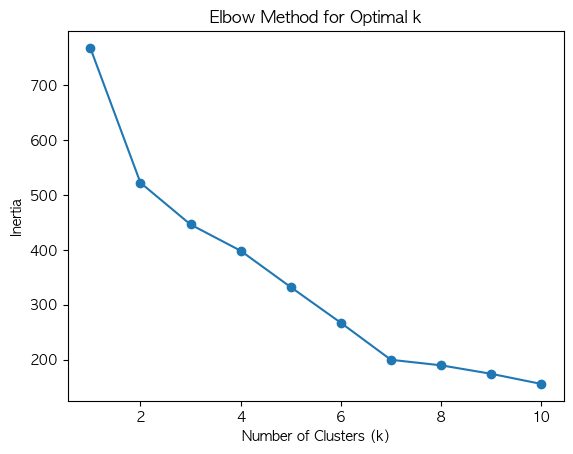

In [509]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 엘보우 방법
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# 그래프 시각화
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [510]:
# 최적의 k 값 (예: k=4)로 K-Means 클러스터링 실행
kmeans = KMeans(n_clusters=4, random_state=42)
pivot_df['cluster'] = kmeans.fit_predict(scaled_data)

In [511]:
# 클러스터별 평균 사용 패턴 확인
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=pivot_df.columns[1:-1])
cluster_centers.index.name = 'Cluster'

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


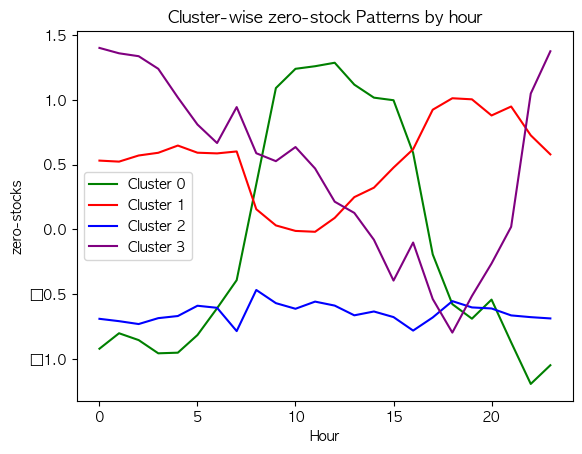

In [512]:
import matplotlib.pyplot as plt

# 클러스터별 색상 지정
colors = ['green', 'Red', 'blue', 'purple']  # 원하는 색상 리스트

# 클러스터별 평균 패턴 시각화
for cluster, color in zip(cluster_centers.index, colors):
    plt.plot(cluster_centers.columns, cluster_centers.loc[cluster], label=f'Cluster {cluster}', color=color)
    
plt.xlabel('Hour')
plt.ylabel('zero-stocks')
plt.title('Cluster-wise zero-stock Patterns by hour')
plt.legend()
plt.show()

In [513]:
### 클러스터링 시각화

In [514]:
query = """
SELECT 
Rental_location_ID,
Latitude,
Longitude
FROM `multi-final-project.Rental_Location_ID_master.Rental_Station_ID_master`

WHERE
  Address_gu LIKE '강남구'
"""

In [515]:
k_means_for_visual_df = client.query(query).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [516]:
# 대여소 리스트와 일치하는 데이터만 필터링
k_means_filtered = k_means_for_visual_df[k_means_for_visual_df['Rental_location_ID'].isin(top_32_df['Rental_location_ID'])]

In [518]:
pivot_df['cluster'] = kmeans.labels_

In [519]:
merged_df = pd.merge(pivot_df, k_means_filtered, on='Rental_location_ID', how='inner')

In [520]:
import folium

# 중심 좌표 설정 (예: 서울 중심 좌표)
center_lat, center_lon = 37.501663, 127.042976
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)


# 클러스터별 색상 설정
colors = ['green', 'Red', 'blue', 'purple'] # 클러스터별 색상

# 대여소별 클러스터를 CircleMarker로 표시
for _, row in merged_df.iterrows():
    cluster_id = row['cluster']
    station_id = row['Rental_location_ID']  # 대여소 ID
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],  # 위도, 경도 정보
        radius=4,  # 원 크기 (작게 설정)
        color=colors[cluster_id % len(colors)],  # 테두리 색상
        fill=True,
        fill_color=colors[cluster_id % len(colors)],  # 내부 색상
        fill_opacity=0.6,  # 투명도
        popup=f"Station ID: {station_id}<br>Cluster: {cluster_id}"  # 팝업에 대여소 ID와 클러스터 표시
    ).add_to(m)

In [521]:
m

In [460]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(re_cluster_df.iloc[:, 1:])

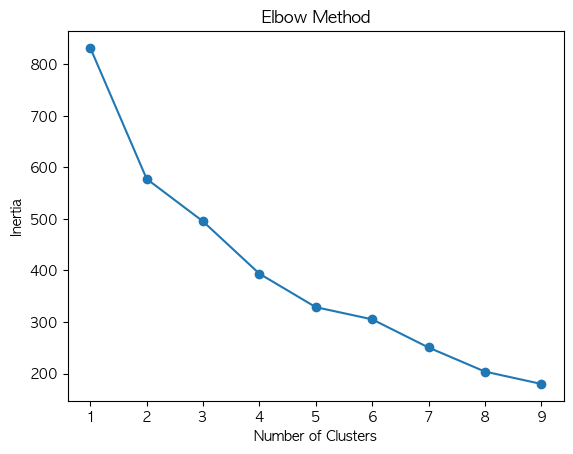

In [461]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):  # 클러스터 개수 1~9 시도
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [462]:
kmeans = KMeans(n_clusters=7, random_state=42)  # 예: 클러스터 개수 3
re_cluster_df['Cluster'] = kmeans.fit_predict(scaled_data)

In [463]:
cluster_centers = None

In [464]:
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_, 
    columns=re_cluster_df.columns[1:25]
)

ValueError: Shape of passed values is (7, 26), indices imply (7, 24)

In [465]:
# 클러스터별 색상 지정 (7개 색상)
colors = ['green', 'red', 'blue', 'purple', 'orange', 'yellow', 'pink']

# 클러스터별 평균 패턴 시각화
for cluster, color in zip(cluster_centers.index, colors):
    plt.plot(
        cluster_centers.columns,        # x축: 시간
        cluster_centers.loc[cluster],  # y축: 해당 클러스터의 평균 값
        label=f'Cluster {cluster}',    # 범례
        color=color                     # 클러스터별 색상
    )

plt.xlabel('Hour')
plt.ylabel('Zero-stock Count')
plt.title('Cluster Comparison by Hour')
plt.legend()
plt.show()

AttributeError: 'NoneType' object has no attribute 'index'

In [466]:
from sklearn.cluster import KMeans

def train_model(num_cluster,data):
    model = KMeans(
        n_clusters=num_cluster,
        n_init =10, #중심점을 잡는 초기값
        random_state=1234
    )
    model.fit(data)
    return model

In [53]:
# tqdm은 과정을 보여주는 로딩바
from tqdm.notebook import tqdm

def elbow_method(data):
    inertia_list = []
    for i in tqdm(range(2,11)): #클러스터 K값을 2~11까지 설정
        model = train_model(i,data)
        inertia_list.append(model.inertia_)
    return inertia_list

In [54]:
# 시각화를 위한 함수값정의

def plot_inertia(inertia_list,target_columns):
    plt.plot(range(2,11),inertia_list, marker = 'o', label = "inertia")
    plt.title(f"{'-'.join(target_columns)} KMeans clustering Inertia")
    plt.xlabel('num clusters')
    plt.ylabel('inertia')

In [ ]:
# 처음 구현 해본 것 클러스터 값 4, 데이터 값 넣기
# model = train_model(4, df[['Age','Spending']])

In [58]:
#inertia를 찾기 위한 def elbow method 활용 데이터 부어넣기
target_columns = ['Time','zero_stock_count']
data = filtered_df1[target_columns]
inertia_list = elbow_method(data)

  0%|          | 0/9 [00:00<?, ?it/s]

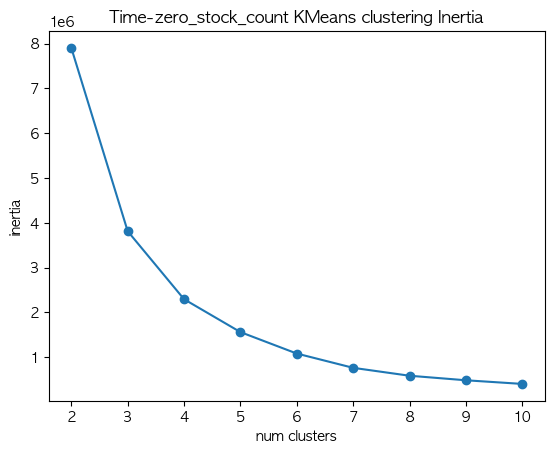

In [59]:
#시각화 함수 구현
plot_inertia(inertia_list,target_columns)

In [60]:
inertia_list

[7904194.693733045,
 3814082.290540344,
 2296310.3934814706,
 1562587.3170423482,
 1083696.8479161744,
 765065.331908285,
 588696.3154438441,
 487468.4194773978,
 405922.4451884429]

In [61]:
k = 4
model = train_model(num_cluster = k, data = data)

In [62]:
def inference(model, data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    return xx, yy, Z

In [63]:
def plot_kmeans_cluster(xx, yy, Z, model, data, columns):
    labels = model.labels_
    centroids = model.cluster_centers_
    plt.figure(1 , figsize = (10, 5))
    plt.clf()
    Z = Z.reshape(xx.shape)
    plt.imshow(
        Z, 
        interpolation='nearest', 
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Pastel2, 
        aspect = 'auto', 
        origin='lower'
    )
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=10)
    plt.scatter(centroids[: , 0], centroids[: , 1],  s=300, c='red', alpha = 0.5)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])

In [64]:
import numpy as np

xx, yy, Z = inference(model,data.values)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


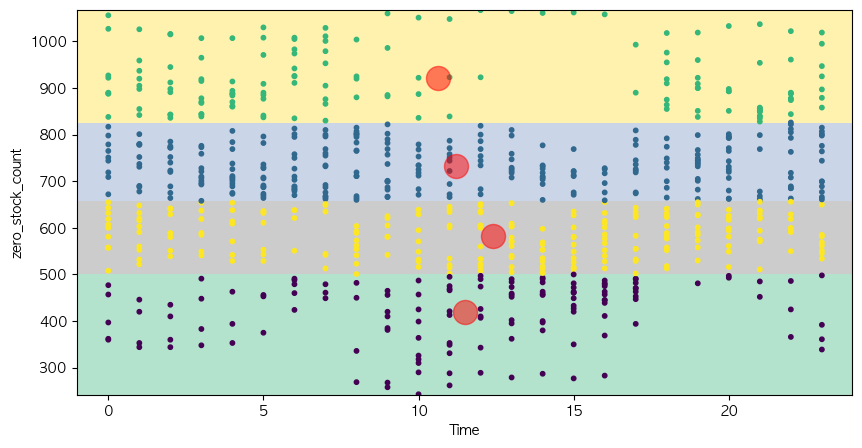

In [65]:
plot_kmeans_cluster(xx, yy, Z, model, data.values, target_columns)

In [66]:
# inertia가 제일 작은 값을 찾는 것
model.inertia_

2296310.3934814706

In [584]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 대여소 그룹 정의
groups = [
    ['ST-1366',	'ST-1561','ST-816','ST-1577','ST-784',	'ST-789'],# 특이한 패턴
    ['ST-1896','ST-786','ST-963'],	#오전 7시 첨두
    ['ST-3115','ST-3108',	'ST-814','ST-3164'], #오전8시 오후6시 첨두
    ['ST-1246', 'ST-960'],# 오전 9시 첨두
    [	'ST-811',	'ST-812',	'ST-966','ST-959','ST-1180'],	#오전 오후 둘다
    ['ST-2684','ST-962','ST-961','ST-809'], # 새벽첨두
    ['ST-817','ST-3208','ST-1568'		],	#오후6시 첨두
    ['ST-1562','ST-953','ST-2882','ST-1883','ST-2682'] # 낮시간대 첨두
]

def plot_group_patterns(df, groups, group_number):
    plt.figure(figsize=(10, 6))
    group = groups[group_number - 1]
    
    for target in group:
        # Filter and plot each Rental_location_ID in the group
        filtered_df_A = df[df['Rental_location_ID'] == target]
        sns.lineplot(x='Time', y='zero_stock_count', data=filtered_df_A, label=target)
    
    plt.title(f'Zero Stock Count by Hour for Group {group_number}')
    plt.xlabel('Time of Day')
    plt.ylabel('Count of Zero Stock Occurrences')
    plt.xticks(ticks=range(0, 24, 1))  # Set x-ticks for each hour
    plt.grid(True)  # Enable grid
    # Add vertical dashed lines for 8 AM and 6 PM
    plt.axvline(x=8, color='Red', linestyle='--', linewidth=1)  # 8 AM
    plt.axvline(x=18, color='red', linestyle='--', linewidth=1)  # 6 PM
    
    plt.legend(title="Rental Locations")
    plt.show()




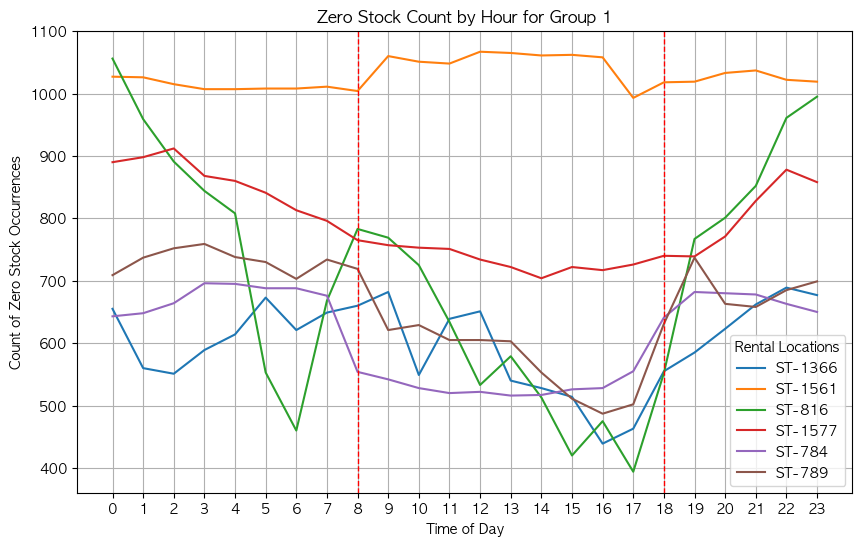

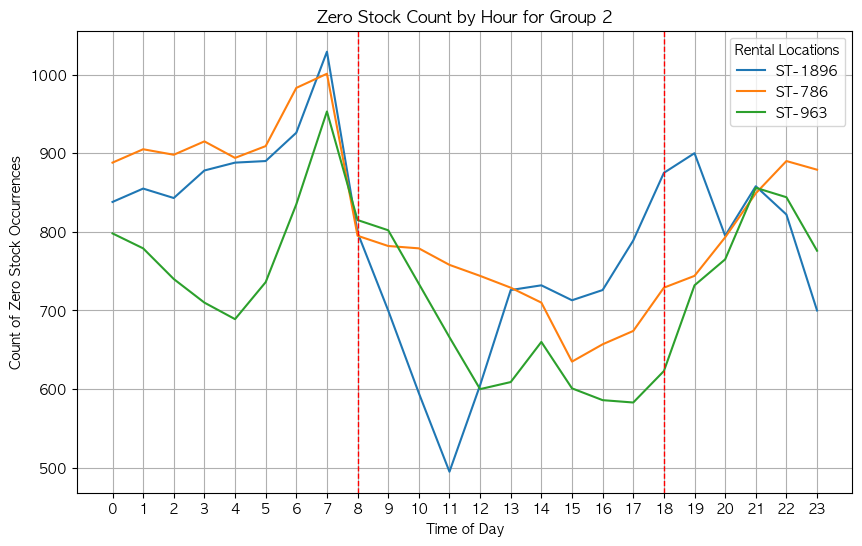

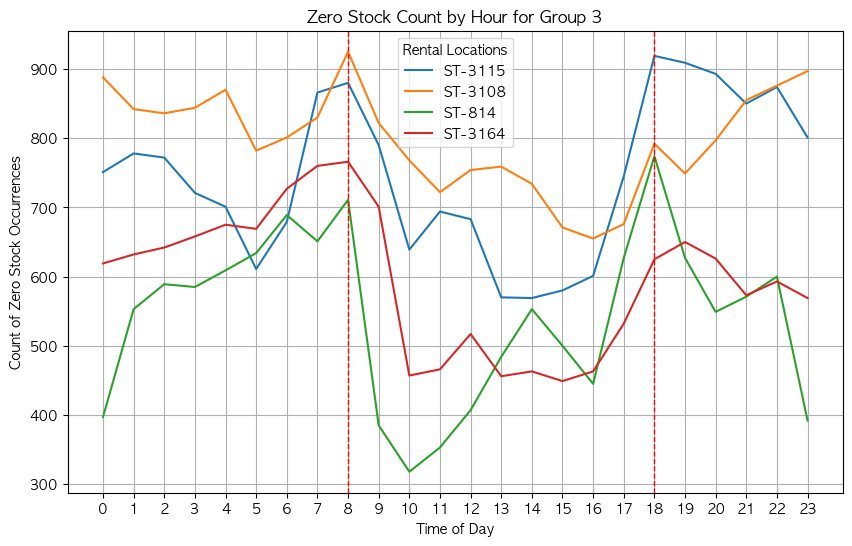

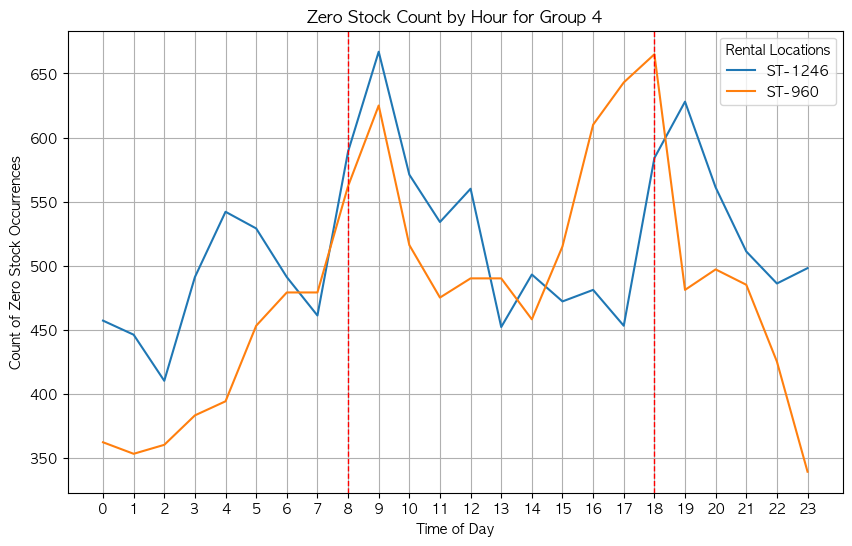

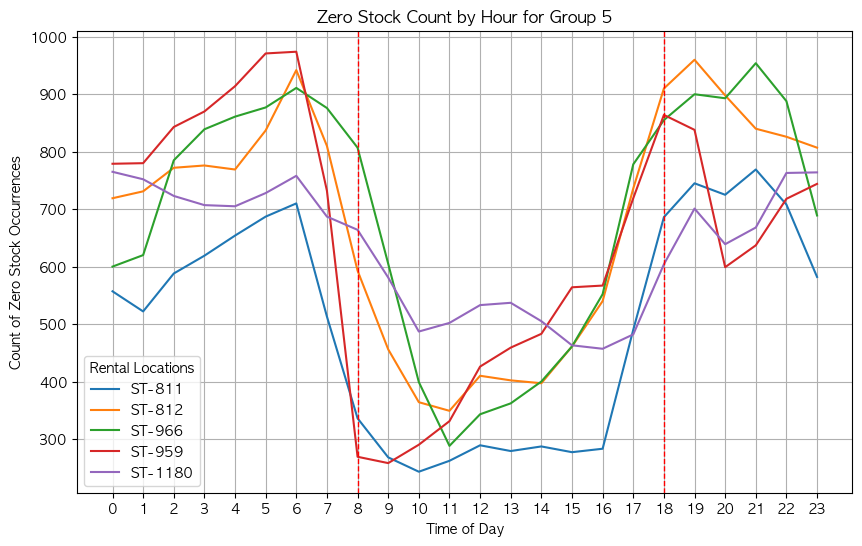

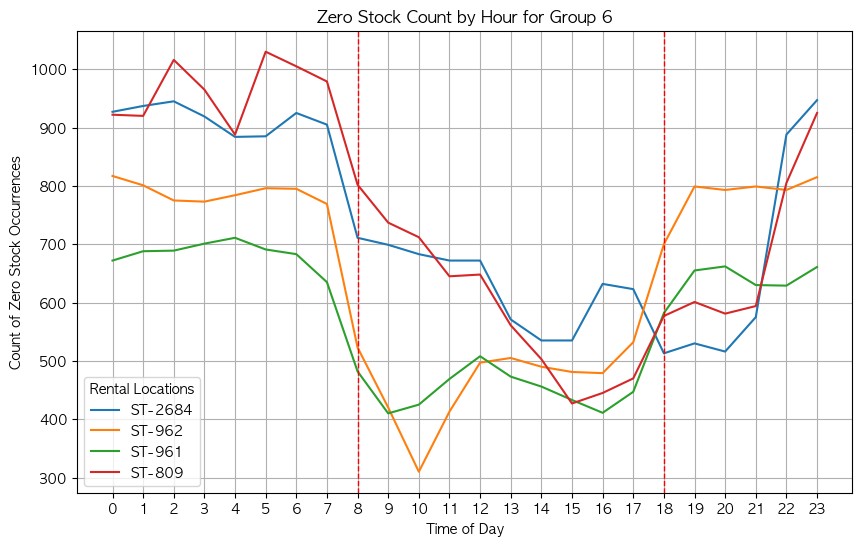

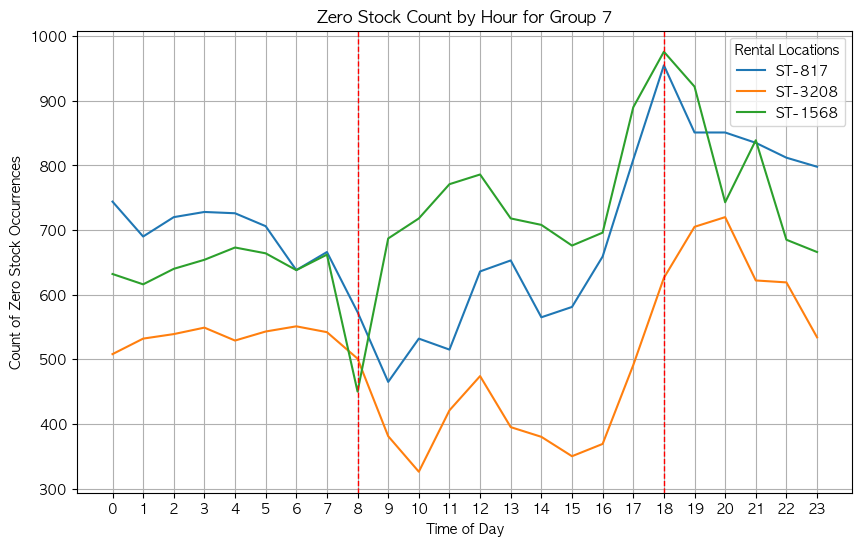

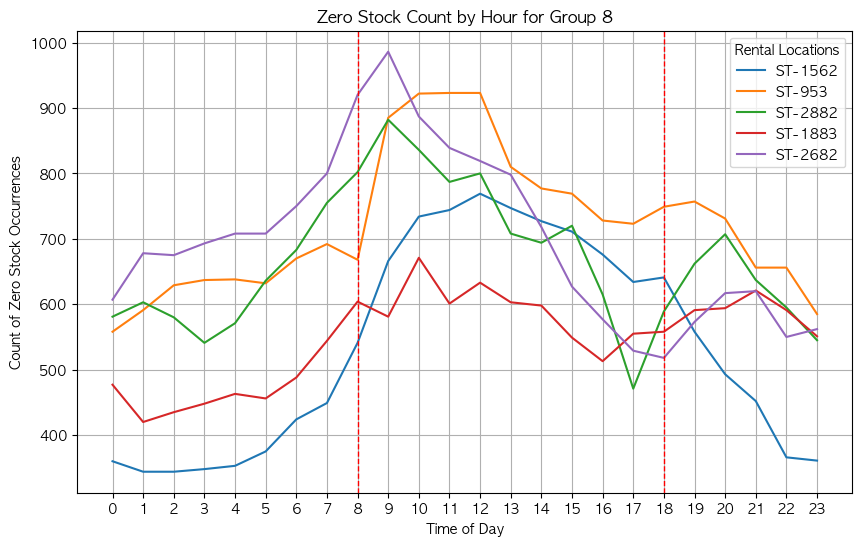

In [585]:
plot_group_patterns(stock_0_time_count_df, groups, group_number=1)
plot_group_patterns(stock_0_time_count_df, groups, group_number=2)
plot_group_patterns(stock_0_time_count_df, groups, group_number=3) 
plot_group_patterns(stock_0_time_count_df, groups, group_number=4)
plot_group_patterns(stock_0_time_count_df, groups, group_number=5)
plot_group_patterns(stock_0_time_count_df, groups, group_number=6)
plot_group_patterns(stock_0_time_count_df, groups, group_number=7)
plot_group_patterns(stock_0_time_count_df, groups, group_number=8)

### 상위 10% 대여소 지도 시각화

In [404]:
query = """
SELECT 
SUM(stock_0_count) AS no_stock,
NS.Rental_location_ID,
SI.Rental_location_number,
SI.Latitude,
SI.Longitude
FROM `multi-final-project.Preprocessing.1109_관리권역_재고0인시간대카운트` AS NS

JOIN
  `multi-final-project.Rental_Location_ID_master.Rental_Station_ID_master` AS SI
  ON
    NS.Rental_location_ID = SI.Rental_location_ID

WHERE
  stock_0_count = 1

GROUP BY
  NS.Rental_location_ID, SI.Rental_location_number,SI.Latitude, SI.Longitude

ORDER BY
  no_stock DESC
  """

In [405]:
stock_0_map_df = client.query(query).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [406]:
# 대여소 리스트와 일치하는 데이터만 필터링
filtered_df = stock_0_map_df[stock_0_map_df['Rental_location_ID'].isin(station_id_list)]

In [407]:
top_17_df = filtered_df.head(17)

In [408]:
# # 상위 10%를 구하기 위해 quantile 메서드 사용
# threshold = stock_0_map_df['no_stock'].quantile(0.9)

# 지도 생성 (초기 중심 좌표를 첫 번째 데이터의 위치로 설정)
map_positron = folium.Map(
    location=[top_17_df['Latitude'].iloc[0], top_17_df['Longitude'].iloc[0]],
    zoom_start=14
)

# 데이터프레임을 반복하며 마커 추가
for idx, row in top_17_df.iterrows():
    popup_text = f"Location ID: {row['Rental_location_ID']}<br>Location num: {row['Rental_location_number']}<br>no_stock: {row['no_stock']}"
    # color = 'red' if row['no_stock'] >= threshold else 'blue'  # 상위 10%는 빨간색, 나머지는 파란색
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        radius=3,
        color='red',       # 테두리 색상
        fill=True,
        fill_color=color   # 채우기 색상
    ).add_to(map_positron)

In [409]:
# 지도 출력 (노트북에서만 동작)
map_positron

### 상위 10% 대여소 시간대별 재고 없는 시간 추이
관리 우선순위 상위 10% 대여소만 추려서 재고가 없는 시간대 패턴을 파악해봅니다.

In [367]:
query = """
WITH stocks AS (
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_03
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_04
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_05
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_06
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_07
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_08
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_09
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_10
  UNION ALL
  SELECT *
  FROM multi-final-project.2023_available_bikes.Num_of_available_bikes_11
)

SELECT
  SI.Rental_location_ID,
  stocks.Time,
  COUNT(*) AS zero_stock_count
FROM
  stocks
JOIN
  multi-final-project.Rental_Location_ID_master.Rental_Station_ID_master AS SI
ON
  stocks.Rental_location_number = SI.Rental_location_number
WHERE
  Address_gu LIKE '강남구'
  AND stocks.Num_of_available_bikes = 0
GROUP BY
  SI.Rental_location_ID,
  stocks.Time
ORDER BY
  SI.Rental_location_ID,
  stocks.Time
"""

In [368]:
stock_0_time_count_df = client.query(query).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [411]:
# 대여소 리스트와 일치하는 데이터만 필터링
filtered_df1 = stock_0_time_count_df[stock_0_time_count_df['Rental_location_ID'].isin(top_17_df['Rental_location_ID'])]

In [417]:
filtered_df1.reset_index(drop=True, inplace=True)

In [420]:
pivot_df = filtered_df1.pivot(index='Time', columns='Rental_location_ID', values='zero_stock_count').reset_index()

In [647]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 대여소 그룹 정의
groups = [
    ['ST-1561', 'ST-1577'],
    ['ST-786','ST-963','ST-953', 'ST-2682', 'ST-2882'], #오전, 낮
    ['ST-812', 'ST-966','ST-3115','ST-1896','ST-3108'],# 출퇴근
    ['ST-1568','ST-817','ST-816','ST-809','ST-2684'], #퇴근,야간

]

def plot_group_patterns(df, groups, group_number):
    plt.figure(figsize=(10, 6))
    group = groups[group_number - 1]
    
    for target in group:
        # Filter and plot each Rental_location_ID in the group
        filtered_df_A = df[df['Rental_location_ID'] == target]
        sns.lineplot(x='Time', y='zero_stock_count', data=filtered_df_A, label=target)
    
    plt.title(f'Zero Stock Count by Hour for Group {group_number}')
    plt.xlabel('Time of Day')
    plt.ylabel('Count of Zero Stock Occurrences')
    plt.xticks(ticks=range(0, 24, 1))  # Set x-ticks for each hour
    plt.grid(True)  # Enable grid
    # Add vertical dashed lines for 8 AM and 6 PM
    plt.axvline(x=8, color='skyblue', linestyle='--', linewidth=1)  # 8 AM
    plt.axvline(x=18, color='skyblue', linestyle='--', linewidth=1)  # 6 PM
    
    plt.legend(title="Rental Locations")
    plt.show()




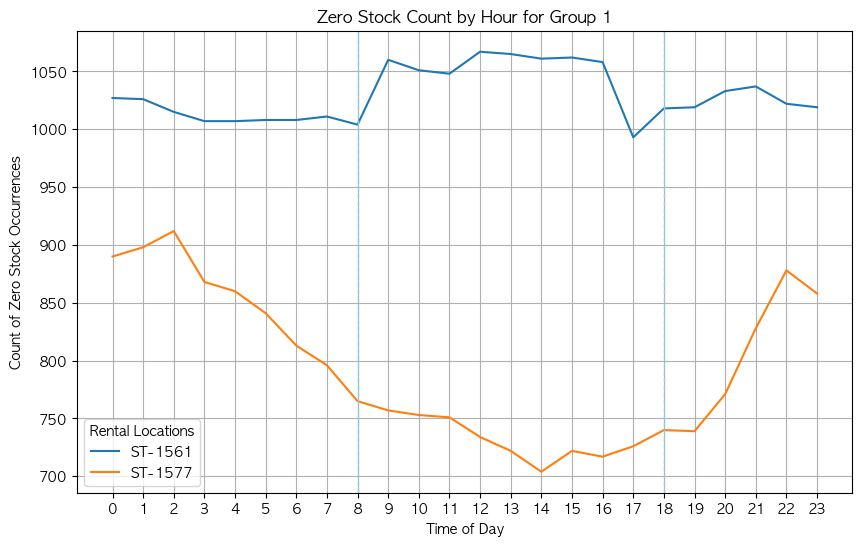

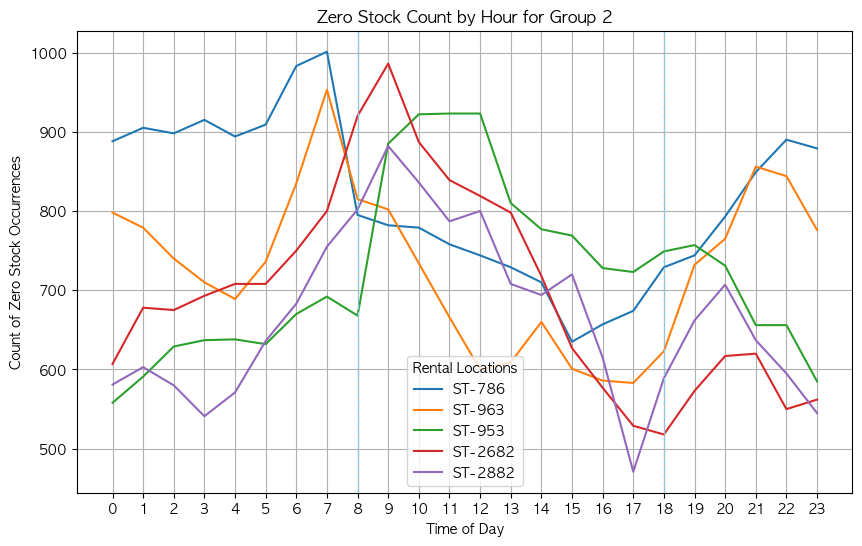

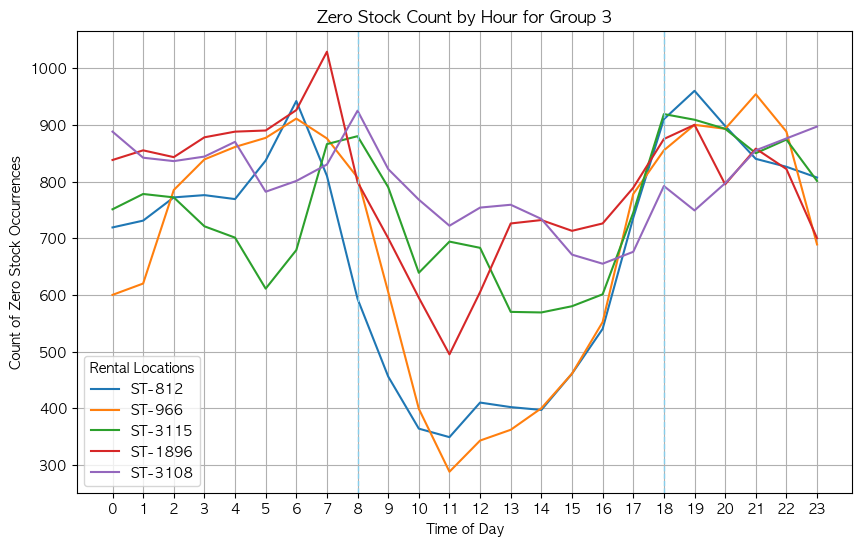

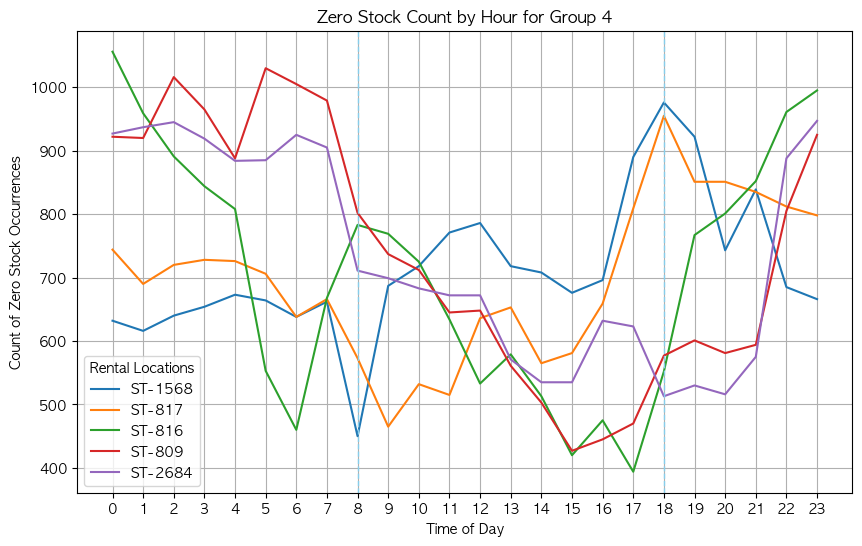

In [649]:
plot_group_patterns(stock_0_time_count_df, groups, group_number=1)
plot_group_patterns(stock_0_time_count_df, groups, group_number=2)
plot_group_patterns(stock_0_time_count_df, groups, group_number=3) 
plot_group_patterns(stock_0_time_count_df, groups, group_number=4)

In [ ]:
# 첫 번째 그룹에 대한 그래프 그리기
plot_group_patterns(stock_0_time_count_df, groups, group_number=1)

In [159]:
query = """
SELECT * FROM `multi-final-project.1031_visualization.1031_bikes_stock_23`
"""

In [160]:
stocks_df = client.query(query).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [201]:
query = """
-- 수요 많고 재고 없는 곳 (15곳) 시각화
WITH RankedRentalLocations AS (
  SELECT -- 강남구 대여소별 대여 건수 집계 23년 자료
    A.Rental_Location_ID,
    A.Rental_location_number,
    REGEXP_EXTRACT(B_rent.Address_1, r'([가-힣]+구)') AS district,
    COUNT(*) AS rental_count,
    B_rent.Latitude,
    B_rent.Longitude,
    ROW_NUMBER() OVER (ORDER BY COUNT(*) DESC) AS rank  -- 대여 횟수 기준 순위 매기기
  FROM
    `multi-final-project.Rental_usage_history.Rental_usage_history_*` AS A
  JOIN
    `multi-final-project.Rental_Location_ID_master.Rental_Location_ID_master_la_lo` AS B_rent
  ON
    A.Rental_Location_ID = B_rent.Rental_Location_ID
  WHERE
    _TABLE_SUFFIX BETWEEN '2301' AND '2312'
    AND NOT REGEXP_CONTAINS(B_rent.Address_1, r'경기도')  -- 경기도 제외
    AND REGEXP_CONTAINS(B_rent.Address_1, r'강남구')  -- 강남구만 불러오기
  GROUP BY
    A.Rental_Location_ID,A.Rental_location_number, district, B_rent.Latitude, B_rent.Longitude
)

-- 특정 대여소 리스트와 매칭하여 순위 찾기
SELECT 
  RankedRentalLocations.Rental_Location_ID,
  RankedRentalLocations.Rental_location_number,
  RankedRentalLocations.rank,
  RankedRentalLocations.rental_count,
  RankedRentalLocations.Latitude,
  RankedRentalLocations.Longitude
FROM 
  RankedRentalLocations
WHERE -- 수요 많고 재고 없는 곳 (15곳) 시각화
  RankedRentalLocations.Rental_Location_ID IN (
    "ST-2688",	"ST-2678",	"ST-1178",	"ST-1881",	"ST-1575",	"ST-1895",	"ST-1680",	"ST-2867",	"ST-1171",	"ST-1884",	"ST-2671",	"ST-1577",	"ST-1896",	"ST-1365",	"ST-2837"
)
ORDER BY rank;
"""

In [202]:
low_stocks_df = client.query(query).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [211]:
low_stocks_df.head()

,Rental_Location_ID,Rental_location_number,rank,rental_count,Latitude,Longitude
0,ST-2688,3627,6,22300,37.530750,127.041603
1,ST-2678,3614,16,16821,37.498402,127.060936
2,ST-1178,2369,21,15453,37.505428,127.052872
3,ST-1881,2415,27,13765,37.496674,127.053429
4,ST-1575,2405,28,12947,37.518711,127.050850


In [203]:
query =  """-- 수요 없고 재고 많은 곳 시각화 (26곳)
WITH RankedRentalLocations AS (
  SELECT -- 강남구 대여소별 대여 건수 집계 23년 자료
    A.Rental_Location_ID,
    A.Rental_location_number,
    REGEXP_EXTRACT(B_rent.Address_1, r'([가-힣]+구)') AS district,
    COUNT(*) AS rental_count,
    B_rent.Latitude,
    B_rent.Longitude,
    ROW_NUMBER() OVER (ORDER BY COUNT(*) DESC) AS rank  -- 대여 횟수 기준 순위 매기기
  FROM
    `multi-final-project.Rental_usage_history.Rental_usage_history_*` AS A
  JOIN
    `multi-final-project.Rental_Location_ID_master.Rental_Location_ID_master_la_lo` AS B_rent
  ON
    A.Rental_Location_ID = B_rent.Rental_Location_ID
  WHERE
    _TABLE_SUFFIX BETWEEN '2301' AND '2312'
    AND NOT REGEXP_CONTAINS(B_rent.Address_1, r'경기도')  -- 경기도 제외
    AND REGEXP_CONTAINS(B_rent.Address_1, r'강남구')  -- 강남구만 불러오기
  GROUP BY
    A.Rental_Location_ID,A.Rental_location_number, district, B_rent.Latitude, B_rent.Longitude
)

-- 특정 대여소 리스트와 매칭하여 순위 찾기
SELECT 
  RankedRentalLocations.Rental_Location_ID,
  RankedRentalLocations.Rental_location_number,
  RankedRentalLocations.rank,
  RankedRentalLocations.rental_count,
  RankedRentalLocations.Latitude,
  RankedRentalLocations.Longitude
FROM 
  RankedRentalLocations
WHERE -- 수요 없고 재고 많은 곳 (26곳)
  RankedRentalLocations.Rental_Location_ID IN (
    "ST-1578",	"ST-1886",	"ST-1703",	"ST-2681",	"ST-2907",	"ST-1892",	"ST-1888",	"ST-1882",	"ST-2677",	"ST-1893",	"ST-2685",	"ST-3111",	"ST-2474",	"ST-1185",	"ST-1172",	"ST-2690",	"ST-1571",	"ST-1576",	"ST-3096",	"ST-2676",	"ST-1560",	"ST-2925",	"ST-1248",	"ST-2927",	"ST-2838",	"ST-1891"
)
ORDER BY rank"""

In [204]:
over_stocks_df = client.query(query).to_dataframe()

In [206]:
# 지도 생성 (초기 중심 좌표를 첫 번째 데이터의 위치로 설정)
map_positron = folium.Map(
    location=[low_stocks_df['Latitude'].iloc[0], low_stocks_df['Longitude'].iloc[0]],
    zoom_start=13
)

# low_stocks_df 데이터에 빨간색 마커 추가
for idx, row in low_stocks_df.iterrows():
    popup_text = f"Location ID: {row['Rental_Location_ID']}<br>Location num: {row['Rental_location_number']}<br>demands_rank: {row['rank']}"
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        radius=3,
        color='red',       # 테두리 색상
        fill=True,
        fill_color='red'   # 채우기 색상
    ).add_to(map_positron)

# over_stocks_df 데이터에 파란색 마커 추가
for idx, row in over_stocks_df.iterrows():
    popup_text = f"Location ID: {row['Rental_Location_ID']}<br>Location num: {row['Rental_location_number']}<br>demands_rank: {row['rank']}"
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        radius=3,
        color='blue',       # 테두리 색상
        fill=True,
        fill_color='blue'   # 채우기 색상
    ).add_to(map_positron)

# 지도 표시
map_positron
